In [1]:
import sys
import os
import networkx as nx
import pandas as pd
import numpy as np


src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

from Ising_Model.IsingModel import IsingModel


src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

In [2]:
edge_list_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\raw_graph\edges_list.csv'
edges_df = pd.read_csv(edge_list_path)

G = nx.from_pandas_edgelist(edges_df, source='source', target='target')

Simulating: 100%|██████████| 100/100 [00:54<00:00,  1.84temperature/s]


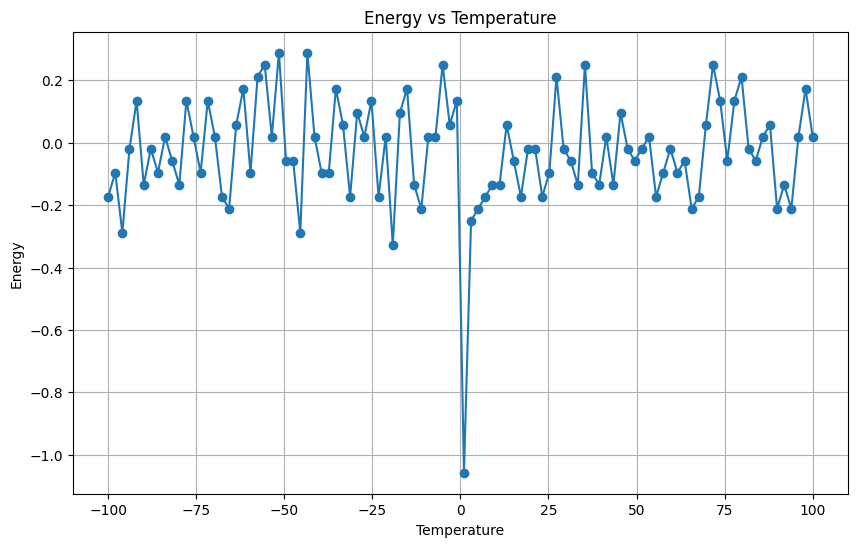

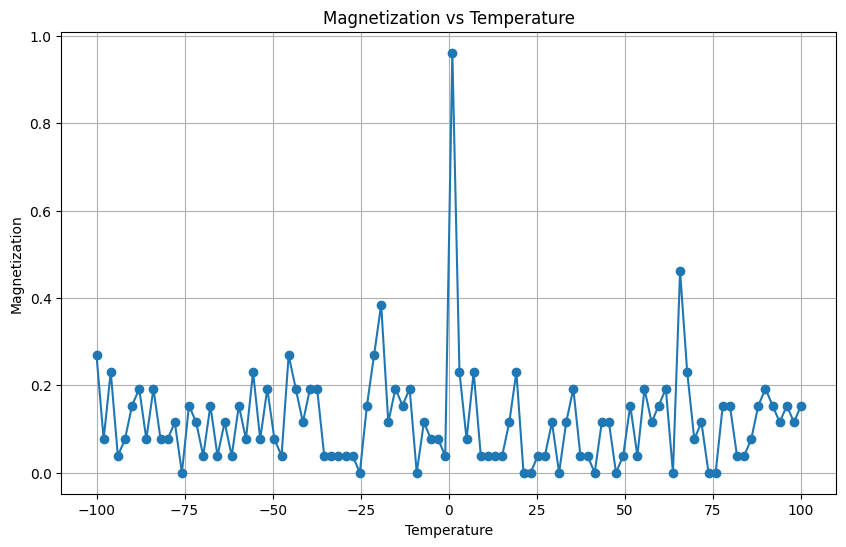

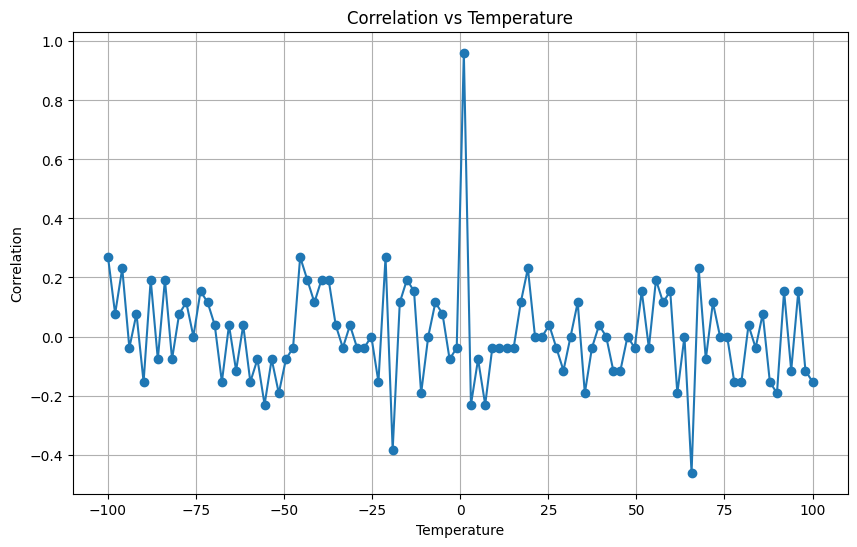

In [5]:
# Define temperature range and simulation parameters
temperatures = np.linspace(-100, 100, 100)  # From 0.1 to 4.0
steps_per_temperature = 50

# Run the simulation
ising_model = IsingModel(G)
energy_data, magnetization_data, correlation_data = ising_model.simulate(temperatures, steps_per_temperature)

# Plot the results
IsingModel.plot_quantity_vs_temperature(energy_data, temperatures, "Energy")
IsingModel.plot_quantity_vs_temperature(magnetization_data, temperatures, "Magnetization")
IsingModel.plot_quantity_vs_temperature(correlation_data, temperatures, "Correlation")
